In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
contador = 1
def teste(row):
    global contador
    if (row['Switch'] == 'HW'):
        return contador
    else:
        retorno = contador
        contador += 1
        return retorno

In [3]:
df = pd.read_table("../Saidas/Teste5/info_sw.txt", sep=" ")
df["Medicao"] = df.apply (teste, axis=1)
#df.reset_index().set_index('index', drop=False)
df

,Tempo,Switch,RegrasInstaladas,RegrasAceitas,VezesBloqueado,BytesEnviados,Medicao
0,23,HW,2,2,0,0,1
1,38,HW,2,2,0,0,1
2,53,HW,2,2,0,0,1
3,62,SW,278,20284,0,566662824,1
4,63,SW,536,20284,0,566662824,2
5,63,SW,667,20284,0,566662824,3
6,68,HW,250,250,2,163766232,4
7,83,HW,165,250,2,896265216,4
8,97,SW,727,20628,0,566662824,4
9,98,HW,197,370,2,1558273248,5


In [4]:
# Função para cálculo do intervalo de confiança de 95%
def confinterval (data):
    confidence = 0.95
    return st.sem (data) * st.t.ppf ((1 + confidence) / 2.0, len (data) - 1);

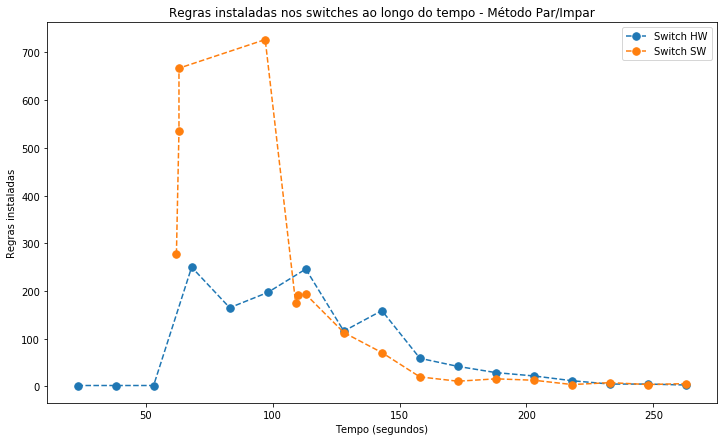

In [5]:
#Agrupando por switch
groups = df.groupby (['Switch'])
#for key,item in gpb:
    #print(gpb.get_group(key), "\n\n")

# Plot
fig, ax = plt.subplots(figsize = (12,7))
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.Tempo, group.RegrasInstaladas, marker='.', linestyle='--', ms=15, label="Switch "+name, alpha=1)
plt.xlabel('Tempo (segundos)')
plt.ylabel('Regras instaladas')
plt.title(u"Regras instaladas nos switches ao longo do tempo - Método Par/Impar") #u = unicode
ax.legend()
#plt.savefig('regrasInstaladas_Tempo_ParImpar.pdf')
plt.show()